In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
### Data Preparation

In [3]:
# Read csv
df = pd.read_csv('data/crypto_data.csv')
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [4]:
# Filter for currencies that are currently being traded
crypto_df = df[df['IsTrading'] == True]

# Drop the 'IsTrading' column
crypto_df = crypto_df.drop(columns = 'IsTrading')

In [5]:
# Remove all rows that have at least one null value
crypto_df = crypto_df.dropna()

crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [6]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]

crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [7]:
# Delete the 'CoinName' column as it does not contribute to the analysis of the data
crypto_df = crypto_df.drop(columns = ['CoinName', 'Unnamed: 0'])

crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [8]:
# Convert the remaining features with text values, `Algorithm` and `ProofType`, into numerical data
x = pd.get_dummies(crypto_df, columns = ['Algorithm', 'ProofType'])
x

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome
from sklearn.preprocessing import StandardScaler
crypto_df_scaled = StandardScaler().fit_transform(x)

In [10]:
### Dimensionality Reduction

In [15]:
# Initialize PCA model with a desired explained variance of 90%
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(crypto_df_scaled)

crypto_pca.shape

(532, 74)

In [17]:
print('Preserving 90% of the explained variance in dimensionality reduction reduced the number of features from 98 to 74.')

Preserving 90% of the explained variance in dimensionality reduction reduced the number of features from 98 to 74.


In [18]:
# Reduce the dataset dimensions with t-SNE

# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

# Reduce dimensions
tsne_features = tsne.fit_transform(crypto_pca)

tsne_features.shape

(532, 2)

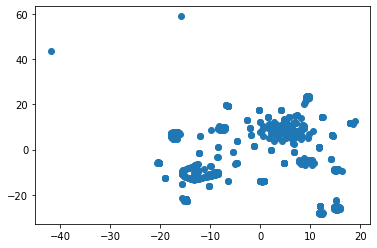

In [20]:
# Plot the t-SNE output on a scatter plot
x_data = tsne_features[:,0]
y_data = tsne_features[:,1]

plt.scatter(x_data, y_data)
plt.show()

In [21]:
### Cluster Analysis with k-Means

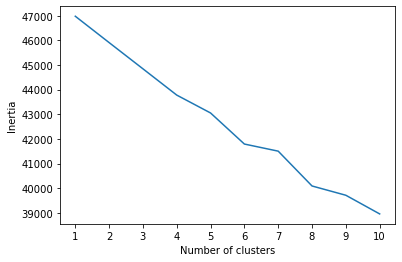

In [22]:
# Finding the best value for k using the Elbow Curve
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [24]:
print('We cannot determine where the elbow of the plot is and, thus, which value of k to use.')

We cannot determine where the elbow of the plot is and, thus, which value of k to use.


In [25]:
### Recommendation

In [30]:
print('There are many dimensions to existing cryptocurrencies that make clustering them extremely difficult.')
print('The number of clusters you select will be dependent on your business use case, meaning a universal classification system does not exist.')

There are many dimensions to existing cryptocurrencies that make clustering them extremely difficult.
The number of clusters you select will be dependent on your business use case, meaning a universal classification system does not exist.
